# Як вмирають люди у США? Візуалізація смертності

**Смерть**  це важка тема, однак ця тема важлива для уряду, охорони здоров'я, економіки та медицини. Розуміння того, як люди вмирають може призвести до змін у фінансування досліджень або посилення профілактичних заходів щодо певних сучасних хвороб. 

У США, **Centers of Disease Control and Prevention (CDC)** (центри контролю та профілактики захворювання) збирали  [дані про смертність](https://wonder.cdc.gov/ucd-icd10.html) з 1999 до 2015 року. Дані багаті на демографічну інформацію, включають вік смерті, хворобу, що стала її причиною, стать, расу та географічне місце (місто/штат).

Ці дані допоможуть нам відповісти на багато **питань про смерть**:
- Які основні причини смерті у США?
- Чи частіше помирають чоловіки, чи жінки? Чи залежить це від причини хвороби? Або від віку?
- Які причини смерті стають більше чи менше поширеними з часом?

#### Вивчення візуалізації даних 

В цьому документі, Ви ознайомитесь з **Matplotlib**, одним з найбільш популярних пакетів візуалізації даних у Python.

Бібліотека **Matplotlib** має досить різноманітні інструменти, але ми з вами подивимось основні з них. Якщо ви захочете дізнатись про **Matplotlib** більше, то можете прочитати офіційну документацію за [посиланням](http://matplotlib.org/).

<a id="mpl"></a>
## Імпорт бібліотеки **Matplotlib**

Для початку, давайте встановимо всі необхідні бібліотеки для побудови графіків.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Ця команда дозволяє перенести виконання бекенд та фронтенд частини графіків у браузер Notebook.
# На даний момент це не дуже помітно, але на майбутнє рекомендується це використовувати
%matplotlib inline 

import sys

<a id="getdata"></a>
## Отримання даних

Тепер давайте зчитаємо файл `deaths.csv`:

In [2]:
df = pd.read_csv("deaths.csv", encoding='GBK') # дозвіл на зчитування китайських символів
df

,Cause,Code-ICD-10-113,Age,Gender,Year,Deaths,Population,Crude Rate
0,Salmonella infections,GR113-001,0,F,2005,0,1956682,Unreliable
1,Salmonella infections,GR113-001,0,F,2010,1,1929877,Unreliable
2,Salmonella infections,GR113-001,0,F,2015,3,1942904,Unreliable
3,Salmonella infections,GR113-001,1,F,2005,0,1950494,Unreliable
4,Salmonella infections,GR113-001,1,F,2010,0,1947217,Unreliable
...,...,...,...,...,...,...,...,...
30901,Enterocolitis due to Clostridium difficile,GR113-136,99,M,2010,6,Not Applicable,Not Applicable
30902,Enterocolitis due to Clostridium difficile,GR113-136,99,M,2015,7,Not Applicable,Not Applicable
30903,Enterocolitis due to Clostridium difficile,GR113-136,100,M,2005,8,Not Applicable,Not Applicable
30904,Enterocolitis due to Clostridium difficile,GR113-136,100,M,2010,4,Not Applicable,Not Applicable


Добре! Тепер дані збережено у змінній **`df`**.

<a id="understand"></a>
## Вивчення даних

#### Топ 10 рядків:

In [3]:
df.head(10)

,Cause,Code-ICD-10-113,Age,Gender,Year,Deaths,Population,Crude Rate
0,Salmonella infections,GR113-001,0,F,2005,0,1956682,Unreliable
1,Salmonella infections,GR113-001,0,F,2010,1,1929877,Unreliable
2,Salmonella infections,GR113-001,0,F,2015,3,1942904,Unreliable
3,Salmonella infections,GR113-001,1,F,2005,0,1950494,Unreliable
4,Salmonella infections,GR113-001,1,F,2010,0,1947217,Unreliable
5,Salmonella infections,GR113-001,1,F,2015,0,1939269,Unreliable
6,Salmonella infections,GR113-001,2,F,2005,0,1932337,Unreliable
7,Salmonella infections,GR113-001,2,F,2010,0,2004731,Unreliable
8,Salmonella infections,GR113-001,2,F,2015,0,1939979,Unreliable
9,Salmonella infections,GR113-001,3,F,2005,0,1930395,Unreliable


#### The bottom 5 rows:

In [4]:
df.tail(5)

,Cause,Code-ICD-10-113,Age,Gender,Year,Deaths,Population,Crude Rate
30901,Enterocolitis due to Clostridium difficile,GR113-136,99,M,2010,6,Not Applicable,Not Applicable
30902,Enterocolitis due to Clostridium difficile,GR113-136,99,M,2015,7,Not Applicable,Not Applicable
30903,Enterocolitis due to Clostridium difficile,GR113-136,100,M,2005,8,Not Applicable,Not Applicable
30904,Enterocolitis due to Clostridium difficile,GR113-136,100,M,2010,4,Not Applicable,Not Applicable
30905,Enterocolitis due to Clostridium difficile,GR113-136,100,M,2015,14,Not Applicable,Not Applicable


#### Який діапазон значень віку у даних?

In [5]:
df.Age.describe() 
#від 0 до 100 

count    30906.000000
mean        50.000000
std         29.155231
min          0.000000
25%         25.000000
50%         50.000000
75%         75.000000
max        100.000000
Name: Age, dtype: float64

#### Які роки представлені у датасеті?

In [6]:
## Напишіть ваш код тут
df.Age.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

#### Чи представлені у датасеті обидві статі?

In [7]:
## Напишіть ваш код тут

2

#### Які основні статистичні характеристики чисельності смертельних випадків?

In [8]:
## Напишіть ваш код тут
df.Deaths.describe()

count    30906.000000
mean       211.636511
std        930.959087
min          0.000000
25%          0.000000
50%          2.000000
75%         41.000000
max      13846.000000
Name: Deaths, dtype: float64

#### Які причини смертельних випадків представлені у датасеті?

In [9]:
causes = pd.DataFrame(df['Cause'].unique(), columns=['Death Cause']) # прибираємо дублікати
causes = causes.sort_values(by='Death Cause')
causes.index = range(0, len(causes)) # відповідно, змінюємо індекси рядків
causes

,Death Cause
0,Accidents (unintentional injuries)
1,Acute bronchitis and bronchiolitis
2,Acute poliomyelitis
3,Alzheimer's disease
4,Anemias
5,Aortic aneurysm and dissection
6,Arthropod-borne viral encephalitis
7,Assault (homicide)
8,Atherosclerosis
9,Cerebrovascular diseases


<a id="year"></a>
## Смертельні випадки: по рокам

#### Давайте ще раз поглянемо на дані:

In [10]:
df.head(3)

,Cause,Code-ICD-10-113,Age,Gender,Year,Deaths,Population,Crude Rate
0,Salmonella infections,GR113-001,0,F,2005,0,1956682,Unreliable
1,Salmonella infections,GR113-001,0,F,2010,1,1929877,Unreliable
2,Salmonella infections,GR113-001,0,F,2015,3,1942904,Unreliable


#### Скільки загалом смертельних випадків зафіксовано за 2005, 2010 та 2015?

По-перше, давайте згрупуємо дані по роках, потім окремо по стовпчику **Deaths** визначимо сумарно смертельні випадки по роках.

In [11]:
by_year = df.groupby("Year").Deaths.sum()
by_year

Year
2005    2143662
2010    2102234
2015    2294942
Name: Deaths, dtype: int64

Після групування, побудова графіків is easy. Використовуючи **`.plot()`**, слід лише обрати тип графіку: 

In [12]:
import seaborn as sns
sns.set(style = "whitegrid",
  rc    = {'figure.figsize':(9,6)},
)

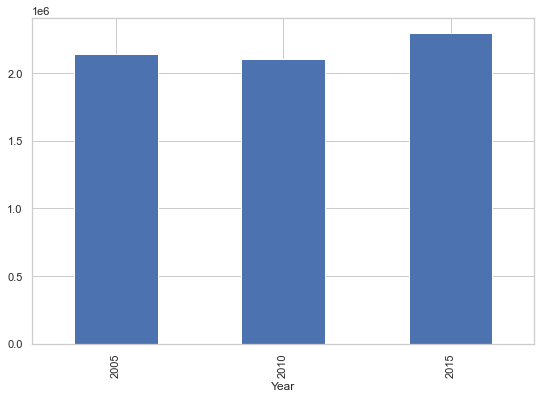

In [13]:
by_year.plot(kind="bar");

#### Також можна переписати код створення даного графіку більш зрозуміло візуально:

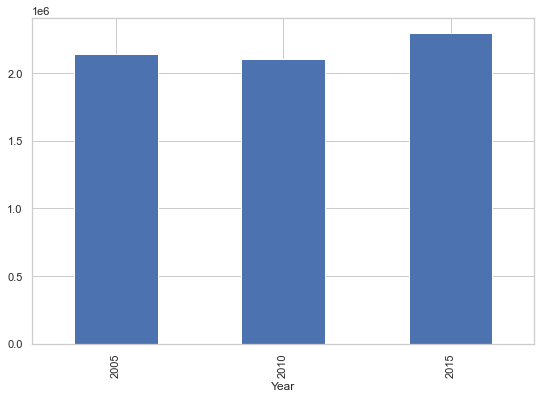

In [14]:
# Для того, щоб код можна було легше читати, продовжіть писати код на наступному рядку, 
# закінчивши попередній слешем
df.groupby("Year")\
.Deaths\
.sum()\
.plot(kind="bar");

## Розділимо дані по роках

Важко зорієнтуватись, якщо одночасно аналізувати дані по всіх роках. 

Давайте звузимо наше дослідження до **смертельних випадків за 2015 рік**

<a id="gender"></a>
## Смерті: Чоловіки vs Жінки

По якій статі рівень смертності у 2015 була найбільшою?

In [15]:
df2015 = df[df.Year == 2015]

df2015\
.groupby("Gender")\
.Deaths\
.sum()

Gender
F    1103789
M    1191153
Name: Deaths, dtype: int64

#### Чи можете ви створити простий графік барів для порівняння загальної кількості смертей по статям?

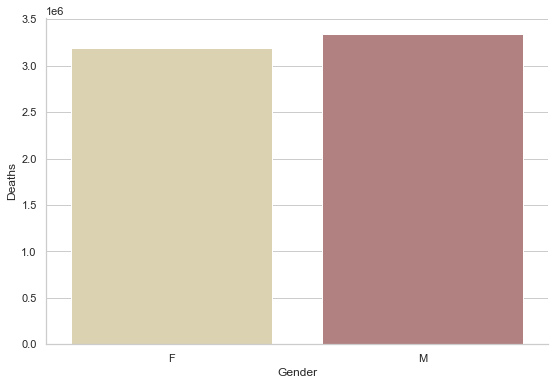

In [16]:
## Напишіть ваш код тут
death_gender = df.groupby('Gender')\
                    .agg({'Deaths':"sum"})
sns.barplot(x=death_gender.index, y=death_gender.Deaths,
           palette='pink_r')
sns.despine()

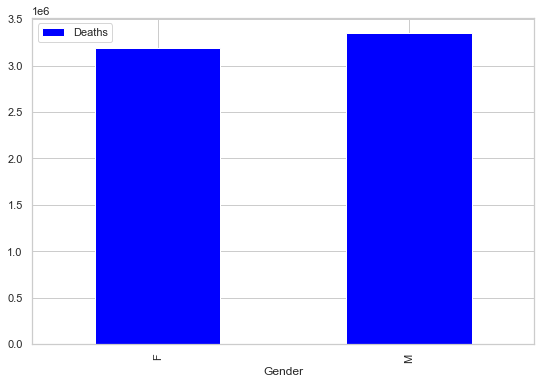

In [17]:
death_gender.plot(kind="bar", color=(["blue", "red"]));

Давайте додамо **кольори** на графік: <font color=red>червоний</font> для **жінок** та  <font color=blue>синій</font> для **чоловіків**.

Можна додати кольори наступним чином:
> `.plot(kind="bar", ` **`color=["red", "blue"]`**`)`

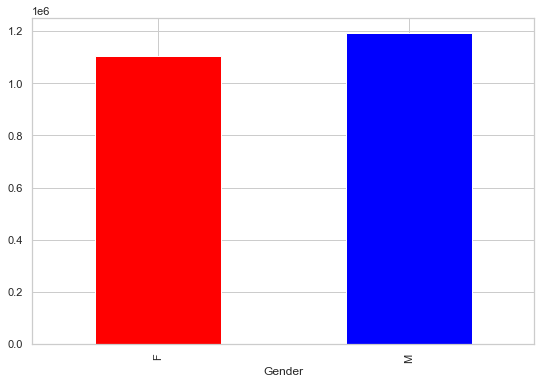

In [18]:
df2015\
.groupby("Gender")\
.Deaths\
.sum()\
.plot(kind="bar", color=["red", "blue"]);
# спробуйте обидві опції. Як вони працюють?
# .plot(kind="bar", color=["green", "red", "blue"])

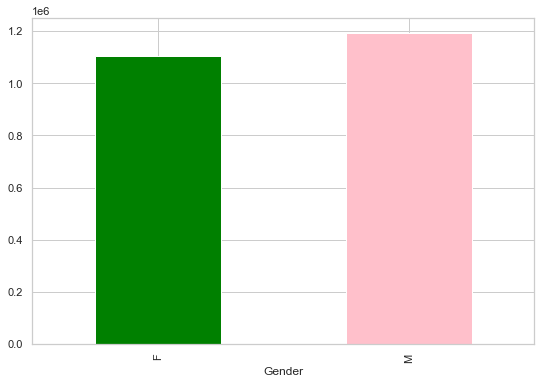

In [19]:
df2015\
.groupby("Gender")\
.Deaths\
.sum()\
.plot(kind="bar",color=["green", "pink", "blue"]);
# спробуйте обидві опції. Як вони працюють?
# .plot(kind="bar", color=["green", "red", "blue"])

<a id="age"></a>
## Смертність: за віком

Що змусило людей помирати у 2015?

In [20]:
## Напишіть ваш код тут
# df.query('Year == "2015" ')
df2015 = df[df.Year == 2015]
df2015.groupby('Cause', as_index=False)\
        .agg({'Deaths':'sum'})\
        .sort_values("Deaths", ascending=False)

,Cause,Deaths
18,Diseases of heart,633813
31,Malignant neoplasms,595919
13,Chronic lower respiratory diseases,155037
0,Accidents (unintentional injuries),146553
9,Cerebrovascular diseases,140315
3,Alzheimer's disease,110561
16,Diabetes mellitus,79531
27,Influenza and pneumonia,57059
35,"Nephritis, nephrotic syndrome and nephrosis",49957
28,Intentional self-harm (suicide),44189


In [21]:
df2015

,Cause,Code-ICD-10-113,Age,Gender,Year,Deaths,Population,Crude Rate
2,Salmonella infections,GR113-001,0,F,2015,3,1942904,Unreliable
5,Salmonella infections,GR113-001,1,F,2015,0,1939269,Unreliable
8,Salmonella infections,GR113-001,2,F,2015,0,1939979,Unreliable
11,Salmonella infections,GR113-001,3,F,2015,0,1943417,Unreliable
14,Salmonella infections,GR113-001,4,F,2015,0,1964111,Unreliable
...,...,...,...,...,...,...,...,...
30893,Enterocolitis due to Clostridium difficile,GR113-136,96,M,2015,23,Not Applicable,Not Applicable
30896,Enterocolitis due to Clostridium difficile,GR113-136,97,M,2015,15,Not Applicable,Not Applicable
30899,Enterocolitis due to Clostridium difficile,GR113-136,98,M,2015,12,Not Applicable,Not Applicable
30902,Enterocolitis due to Clostridium difficile,GR113-136,99,M,2015,7,Not Applicable,Not Applicable


Графік вище важко читати - він **занадто маленький**! 

Ми можемо збільшити розмір графіку:
> `.plot(kind="bar",`** figsize=[18, 6]**`)`

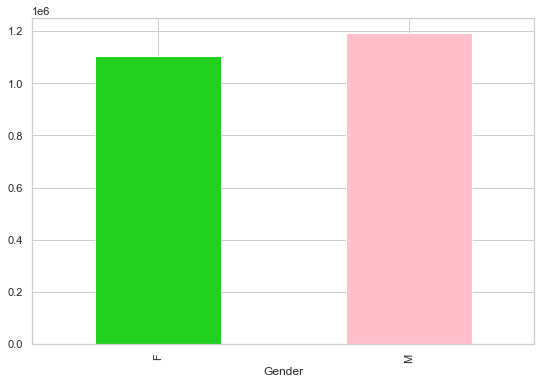

In [22]:
## Напишіть ваш код тут
df2015\
.groupby("Gender")\
.Deaths\
.sum()\
.plot(kind="bar",color=['#1DD11CFC', "pink"], figsize=[9, 6] );
# пограйтесь з іншими варіантами, зрозуймійте як це працює
# .plot(kind="bar", color="grey", figsize=[9, 6])
# .plot(kind="bar", color="grey", figsize=[150, 6])

<font color="green"> Які висновки можна зробити, проаналізувавши графік вище? </font>

Висновки:

За 2015 рік померло більше чоловіків,ніж жінок

<a id="ageXgender"></a>
## Смертність: за віком та статю

#### Чи впливає стать на вік смерті?

Для групування даних по двом змінним, просто використовуйте список:
> `.groupby(`**`["Age", "Gender"]`**`)`

In [23]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()

Age  Gender
0    F          8634
     M         10512
1    F           470
     M           645
2    F           335
               ...  
98   M          3669
99   F          7685
     M          2506
100  F         16615
     M          3985
Name: Deaths, Length: 202, dtype: int64

#### Давайте створимо два підграфіка - по жіночій та чоловічій смертності за віком відповідно

Ми можемо створити підграфіки наступним чином:
> ...  
> **`.unstack(1)`**`\`  
> `.plot(kind="bar", ` **` subplots=True`**`)`

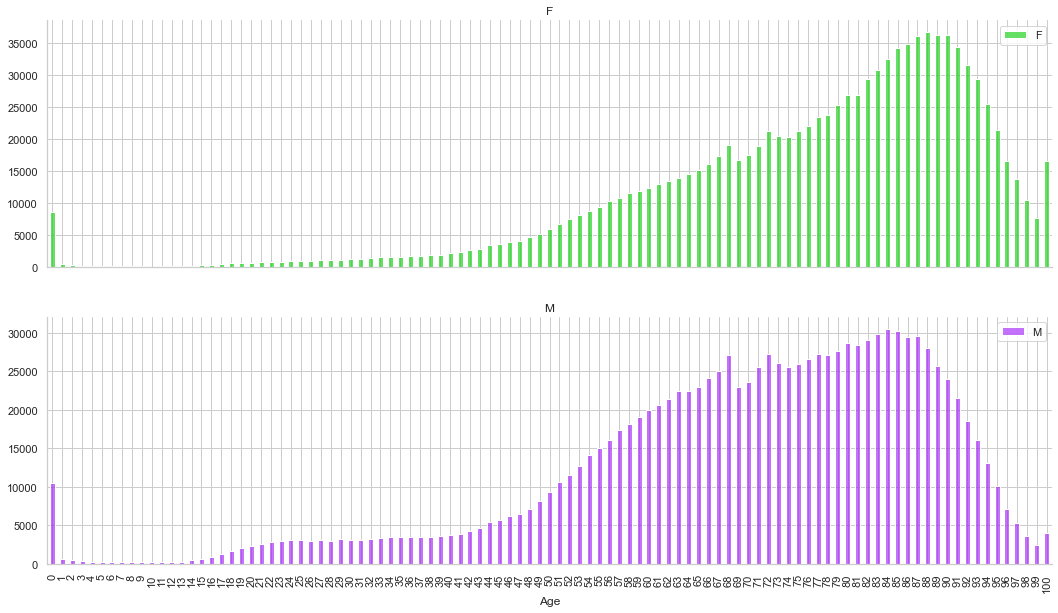

In [24]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind="bar", color=['#1DD11AAC', '#A11BF99F'], figsize=[18, 10], subplots=True)
sns.despine()

<font color="green"> Які висновки можна зробити з графіків вище? </font>

Висновки:

1.Жінки переважно помирають в похилом віці

2.Чоловіки частіше помирають в молодому віці, навіть в утробі матері

3.Приблизно в тричі більше жінок живуть до 100 років

4.Жінки живуть довше

Ми можемо також поєднати чоловіків та жінок разом для створення загального бару. 

Для створення "застеканих" графіків барів, ми можемо використати:
>`.plot(kind="bar", ` **`stacked=True`**`)`

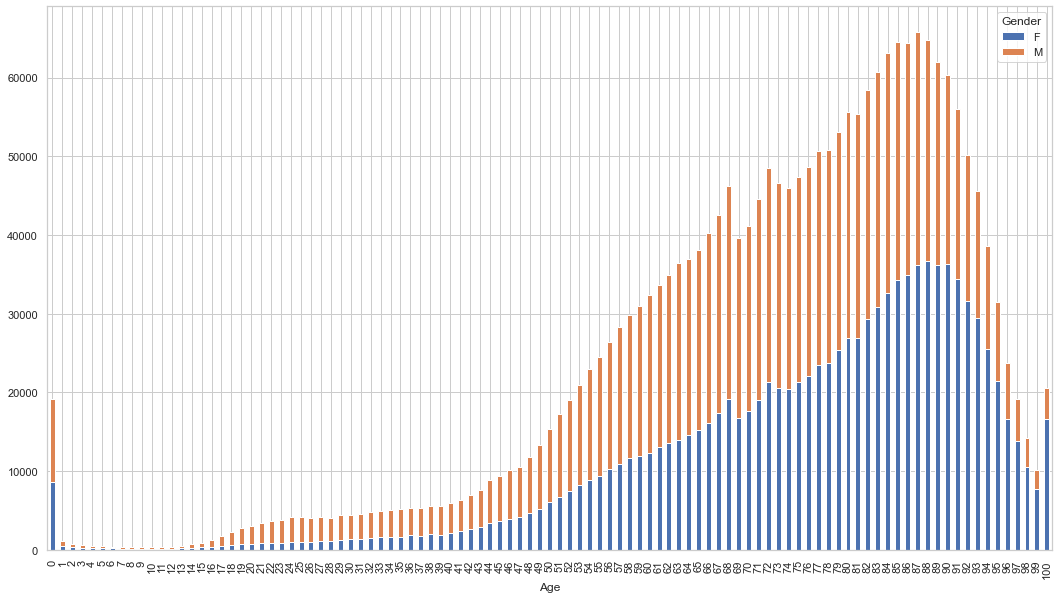

In [25]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind="bar", figsize=[18, 10], stacked=True);

#в одному аргументі для однієї категорії кілька значень, які можуть бути 
# як абсолютними (stacked), так і відносними (full stacked)

Однак це не надто інформативно, оскільки так важко порівняти чоловічі та жіночі показники у загальному графіку барів.

<font color="green"> Наведіть приклади, коли такий вид графіку буде корисно використовувати </font>

Приклади (2):

1.Зміна одних і тих самих даних з часом\локацією (температура серпень\вересень, продаж певного товару по тижням/місям/дням або у різних точках фірми)


#### Оскільки `Age` це безперервна змінна (див. часові ряди даних), для порівняння влучно буде використати лінійний графік. 

Ми можемо створити лінійний графік за допомогою:
> `.plot(kind="`**`line`**`")`

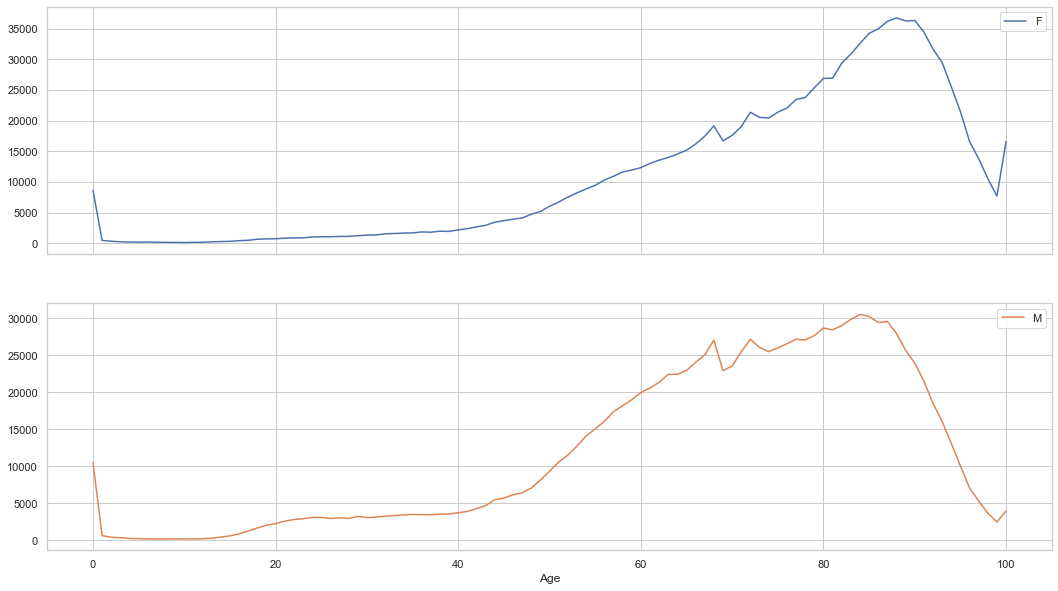

In [26]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind="line", figsize=[18, 10], subplots=True);

Тепер за допомогою тільки ліній, легко порівняти різницю між статями за віком на **одному лінійному графіку**.

Для того, щоб відобразити багато груп на одному графіку, впевніться, що ви не стекали дані та тримали параметр **subplots** як **False (default)**:

>`...`  
>**`.unstack(1)`**`\`  
>`.plot(kind="line")   #Default: subplots = False`

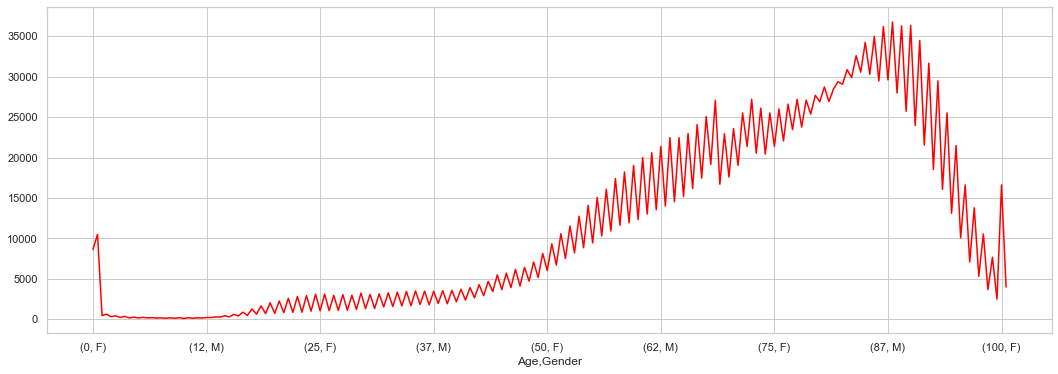

In [27]:
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.plot(kind="line", color=["red", "blue"], figsize=[18, 6]);

Давайте додамо назву графіку та підпис осі у:

> `.plot(kind = "line",` **`title = "Deaths in 2015 by Age and Gender"`**`)`


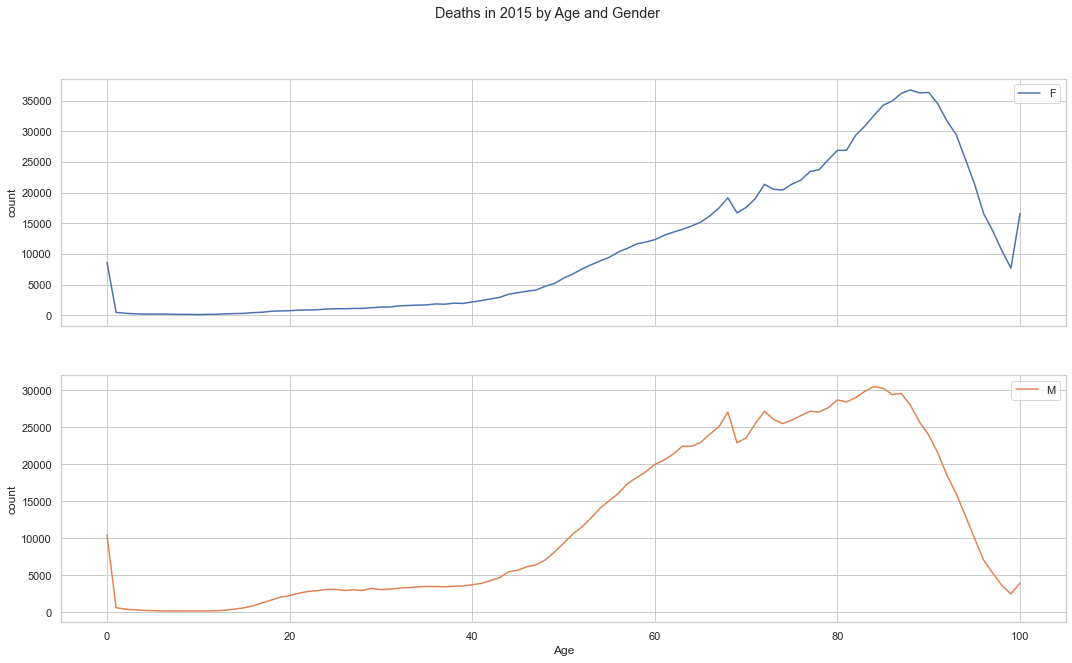

In [28]:
## Напишіть ваш код тут
df2015\
.groupby(["Age", "Gender"])\
.Deaths\
.sum()\
.unstack(1)\
.plot(kind="line", figsize=[18, 10], subplots=True,title = "Deaths in 2015 by Age and Gender",
     ylabel=('count'));

<a id="causeX2015"></a>
## Смертність: топ причин смертей у 2015 році

Давайте подивимось на топ причин смертей у 2015 році:

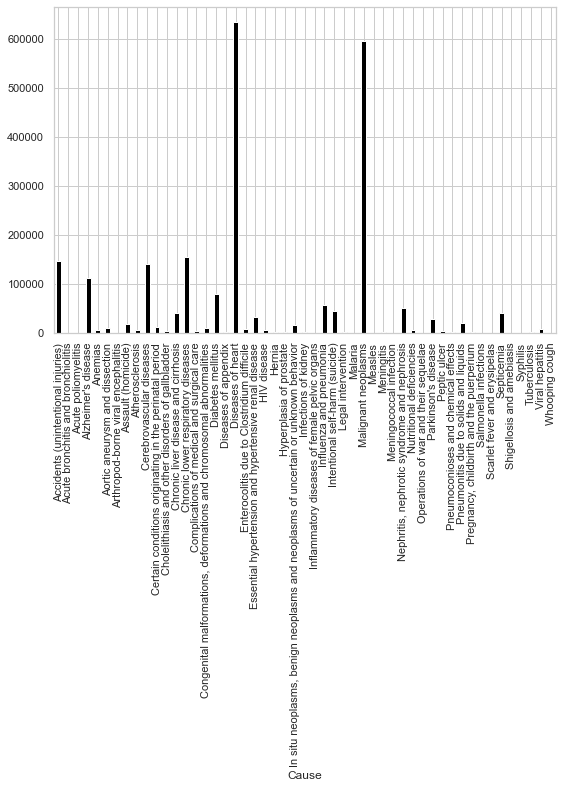

In [29]:
df2015\
.groupby(["Cause"])\
.Deaths\
.sum()\
.plot(kind="bar", color="black");

Це також дуже важко читати. Ми повинні сортувати дані та повернути графік (тобто створити горизонтальний графік барів).

1. Ми можемо **сортувати** (**sort**) дані за допомогою:
> **`.sort('Deaths', ascending=True)`**

2. Ми можемо створити **горизонтальний графік барів** (**horizontal bar chart**) за допомогою:
> **`.plot(kind="barh")`**

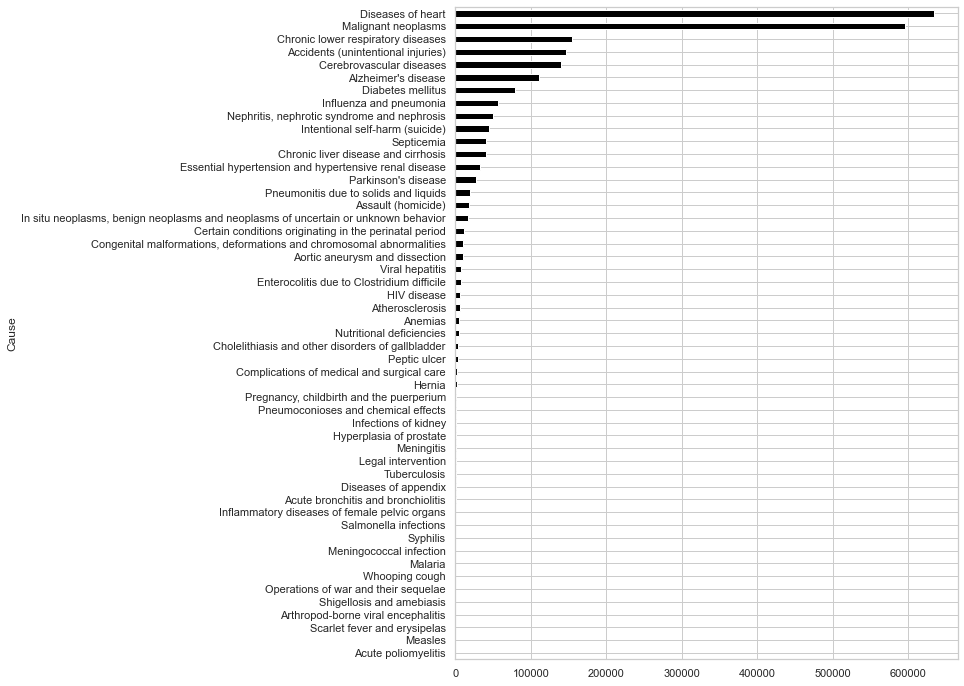

In [43]:
df2015\
.groupby(["Cause"])\
.agg({'Deaths' : sum})\
.sort_values('Deaths', ascending=True)\
.plot(kind="barh", legend=False, color="black", figsize=[9, 12]);

#### Давайте подивимось на ТОП 10 найбільш розповсюджених причин смертності.

Перед побудовою потрібно відсортувати дані наступним чином:
>`.sort('Deaths', ascending=True)`**`[-10:]`**`\`

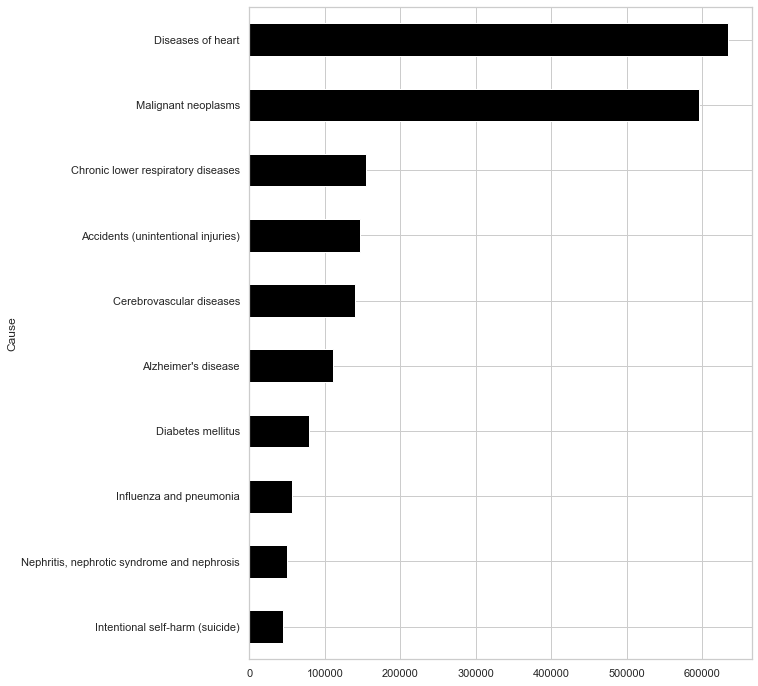

In [45]:
## Напишіть ваш код тут
df2015 = df[df.Year == 2015]
df2015.groupby('Cause')\
        .agg({'Deaths':'sum'})\
        .sort_values("Deaths", ascending=True)[-10:]\
        .plot(kind="barh", legend=False, color="black", figsize=[9, 12]);

<a id="causeXyear"></a>
## Смертність: ТОП причин смертей за віком

In [32]:
df.head()

,Cause,Code-ICD-10-113,Age,Gender,Year,Deaths,Population,Crude Rate
0,Salmonella infections,GR113-001,0,F,2005,0,1956682,Unreliable
1,Salmonella infections,GR113-001,0,F,2010,1,1929877,Unreliable
2,Salmonella infections,GR113-001,0,F,2015,3,1942904,Unreliable
3,Salmonella infections,GR113-001,1,F,2005,0,1950494,Unreliable
4,Salmonella infections,GR113-001,1,F,2010,0,1947217,Unreliable


In [33]:
# за віком чи роками?

<AxesSubplot:ylabel='Cause'>

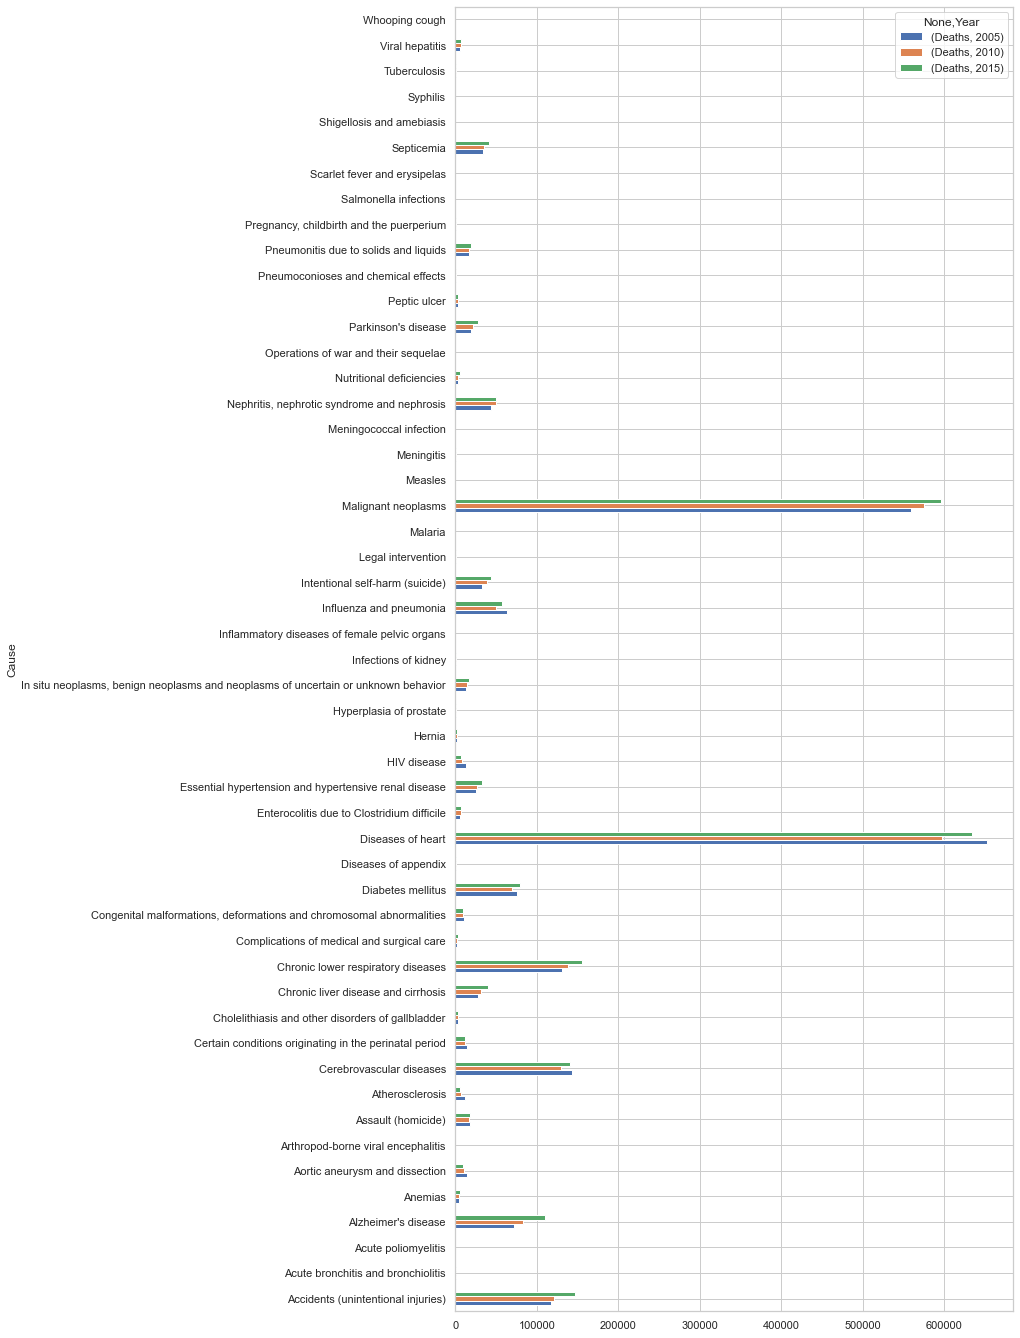

In [34]:
df\
.groupby(["Cause","Year"])\
.agg({'Deaths':sum})\
.sort_values('Deaths', ascending = False)\
.unstack(1)\
.plot(kind="barh", legend=True, figsize=[10, 24])

Візуалізація вище містить дуже багато інформації (можливо забагато). Однак, що Ви помітили? 


**Смертність, спричинена ВІЛ-інфекцією знижувалась кожні 5 років, починаючи з 2005 року!**

<a id="causeXgender"></a>
## Смертність: Причини смертності за статтю

In [35]:
df.head()

,Cause,Code-ICD-10-113,Age,Gender,Year,Deaths,Population,Crude Rate
0,Salmonella infections,GR113-001,0,F,2005,0,1956682,Unreliable
1,Salmonella infections,GR113-001,0,F,2010,1,1929877,Unreliable
2,Salmonella infections,GR113-001,0,F,2015,3,1942904,Unreliable
3,Salmonella infections,GR113-001,1,F,2005,0,1950494,Unreliable
4,Salmonella infections,GR113-001,1,F,2010,0,1947217,Unreliable


In [36]:
## Напишіть ваш код тут
df.groupby(["Cause", "Gender"])\
    .agg({'Deaths':"count"})

Deaths
Cause                              Gender        
Accidents (unintentional injuries) F          303
                                   M          303
Acute bronchitis and bronchiolitis F          303
                                   M          303
Acute poliomyelitis                F          303
...                                           ...
Tuberculosis                       M          303
Viral hepatitis                    F          303
                                   M          303
Whooping cough                     F          303
                                   M          303

[102 rows x 1 columns]

<a id="causeXage"></a>
## Смертність: Причини смертності за віком

Оскільки в датасеті представлена велика кількість причин смертності, давайте оберемо для візуалізації лище декілька з них:

- "Alzheimer's disease" (хворобо Альцгеймера)
- "Diseases of heart" (хвороби серця)
- "Malignant neoplasms" (злоякісні новоутворення)
- "Accidents (unintentional injuries)" (ДТП (нещасні випадки))

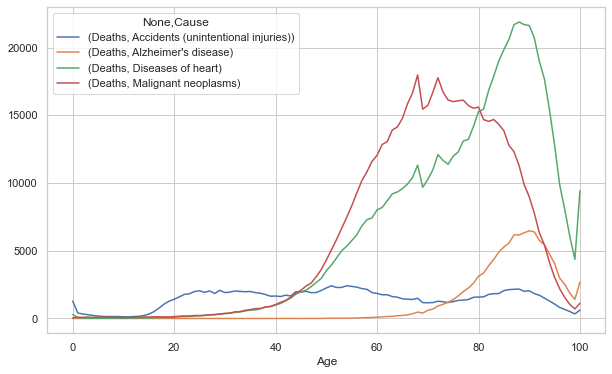

In [37]:
clist = ["Alzheimer's disease", 
         "Diseases of heart", 
         "Malignant neoplasms", 
         "Accidents (unintentional injuries)"]

df2015_clist = df2015[df2015["Cause"].isin(clist)] #isin

df2015_clist\
.groupby(["Age", "Cause"])\
.agg({'Deaths':sum})\
.sort_values('Deaths', ascending=False)\
.unstack(1)\
.plot(kind="line", legend=True, figsize=[10, 6]);

In [38]:
df2015_clist

,Cause,Code-ICD-10-113,Age,Gender,Year,Deaths,Population,Crude Rate
3638,Accidents (unintentional injuries),GR113-112,0,F,2015,536,1942904,27.6
3641,Accidents (unintentional injuries),GR113-112,1,F,2015,160,1939269,8.3
3644,Accidents (unintentional injuries),GR113-112,2,F,2015,124,1939979,6.4
3647,Accidents (unintentional injuries),GR113-112,3,F,2015,103,1943417,5.3
3650,Accidents (unintentional injuries),GR113-112,4,F,2015,80,1964111,4.1
...,...,...,...,...,...,...,...,...
22409,Diseases of heart,GR113-054,96,M,2015,3001,Not Applicable,Not Applicable
22412,Diseases of heart,GR113-054,97,M,2015,2256,Not Applicable,Not Applicable
22415,Diseases of heart,GR113-054,98,M,2015,1646,Not Applicable,Not Applicable
22418,Diseases of heart,GR113-054,99,M,2015,1096,Not Applicable,Not Applicable


<font color="green"> Які висновки можна зробити з графіка вище? </font>

Висновки:

1.В 100 років найчастіше помирають від хвороб серця (усі хвороби в 100 років загостряються і прихводять до смерті) 

2.Найбільша смертність від 80 до 100 років внаслідок хвороб серця 

3.В молодому віці організм людини (з лікуванням) справляється з хворобами і смертність мінімальна


<a id="causeXgenderXage"></a>
## Смертність: причини смертності за статю та віком

Створити таку візуалізацію доволі складно, оскільки тут 2 статі х 3 роки х 51 причина смертності. Практично неможливо відобразити ці дані на одному графіку та проаналізувати їх.

Найкращим виходом буде візуалізувати лише частину даних, або лише найбільш цікаві дані.

C:\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


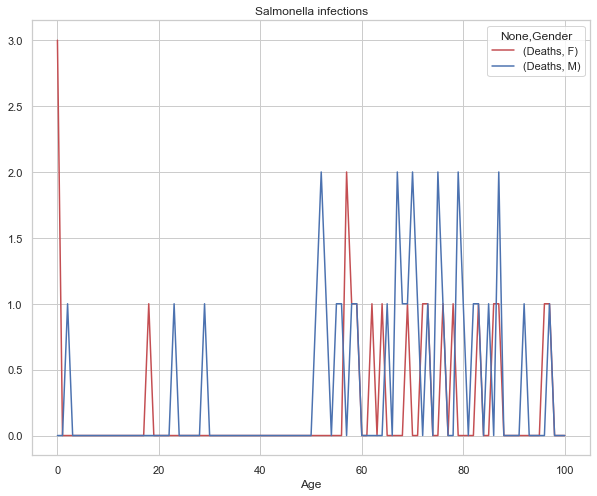

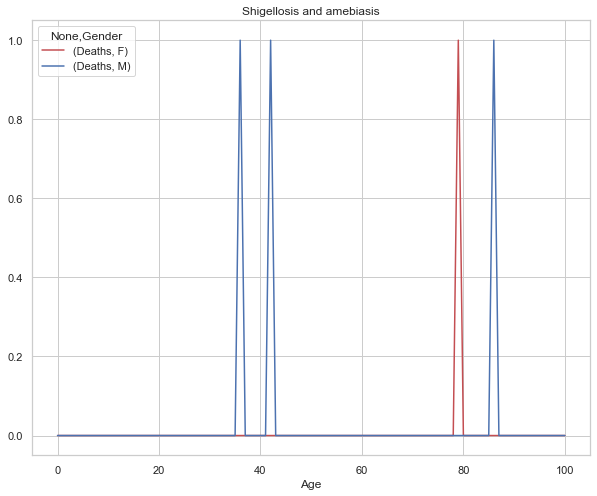

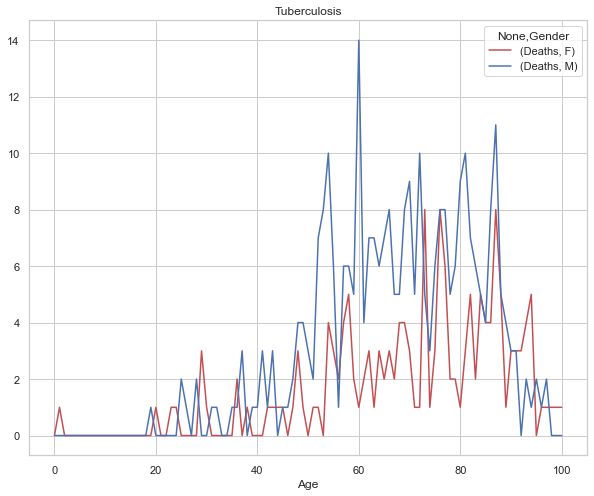

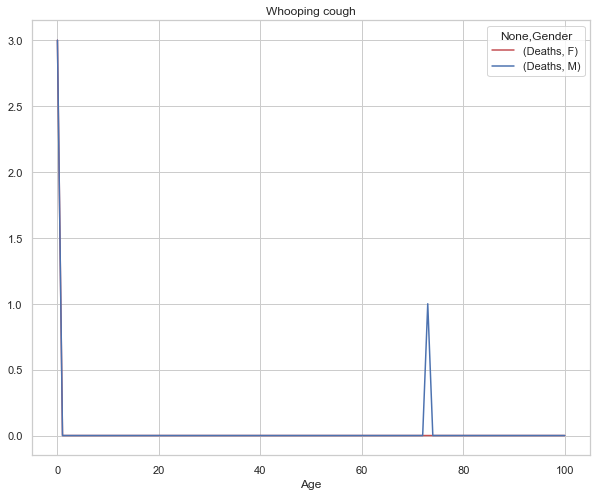

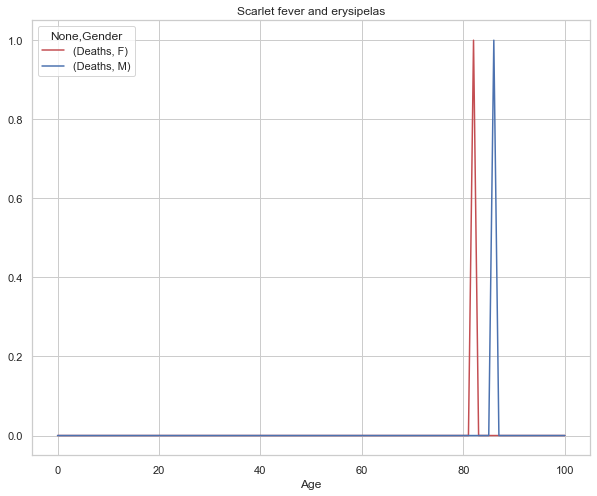

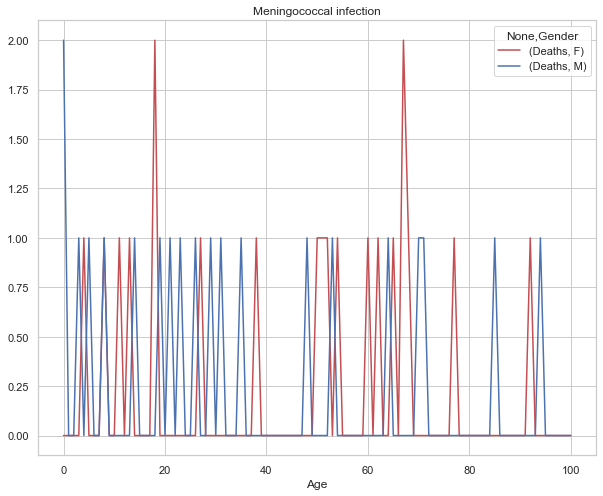

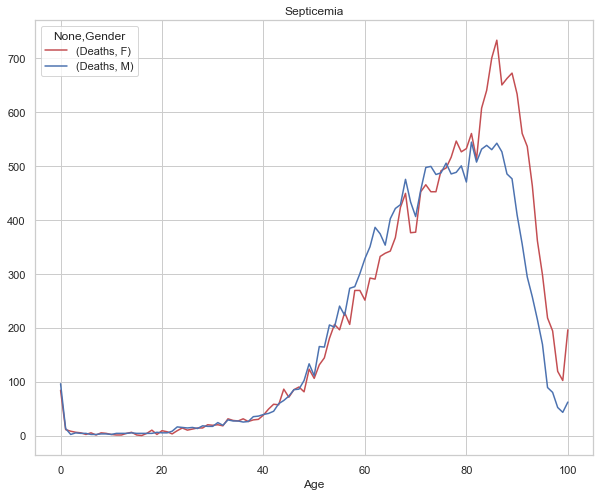

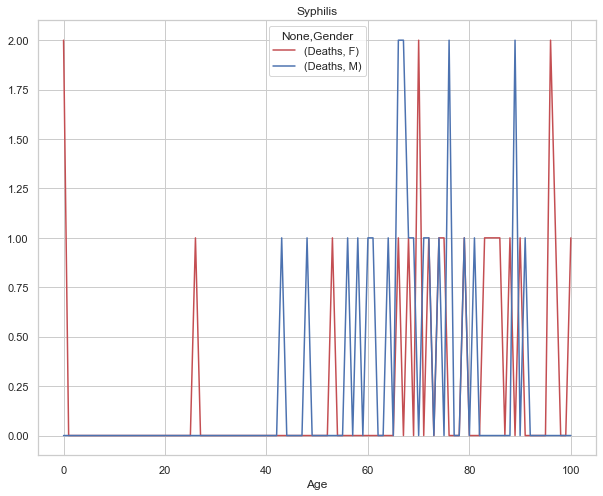

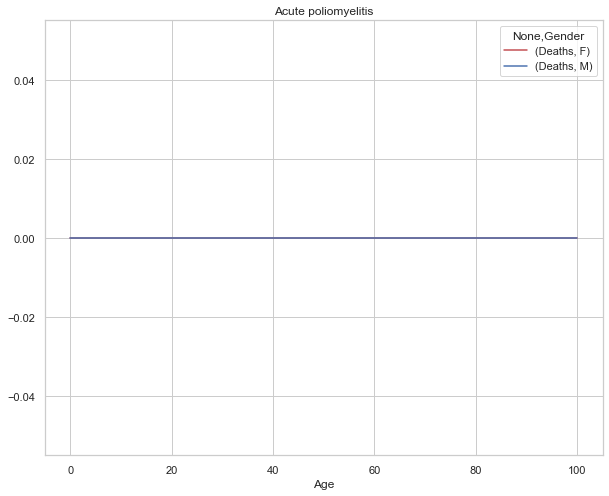

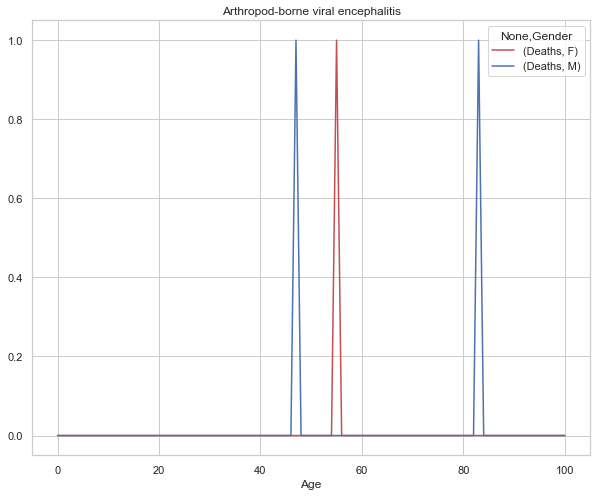

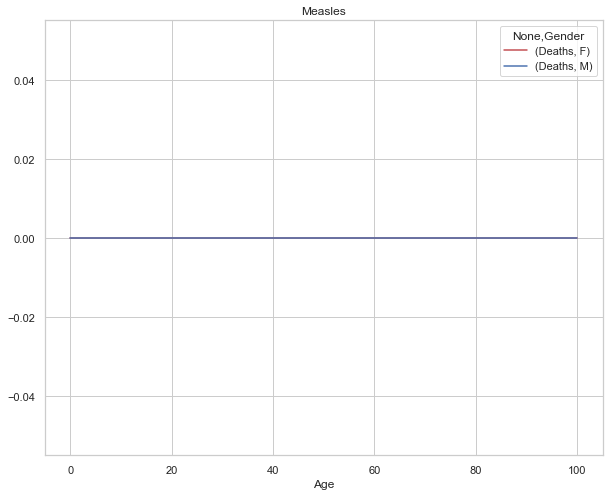

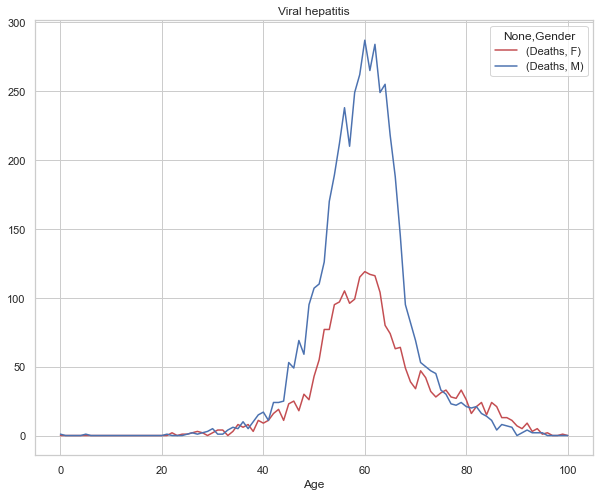

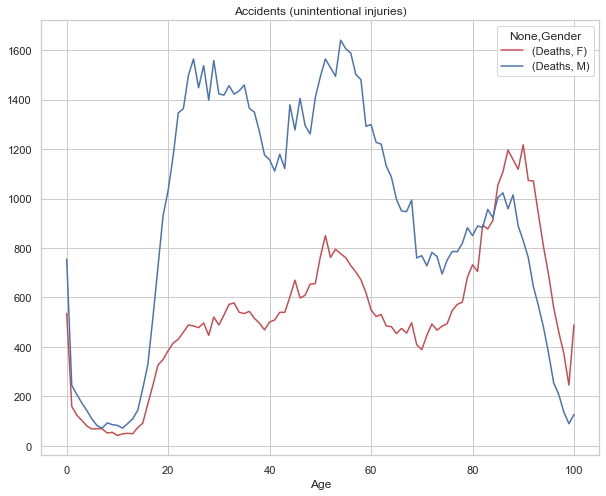

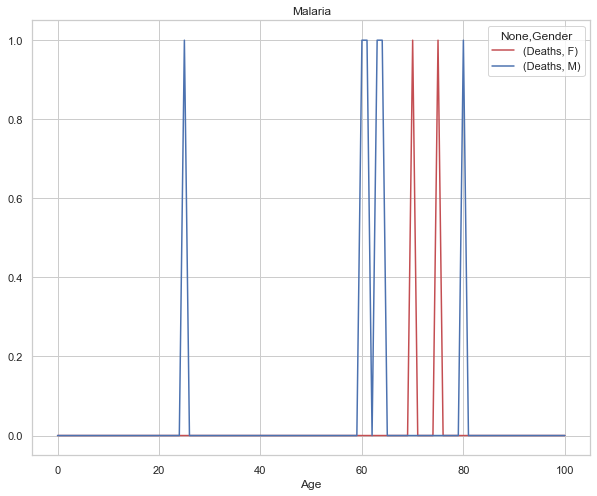

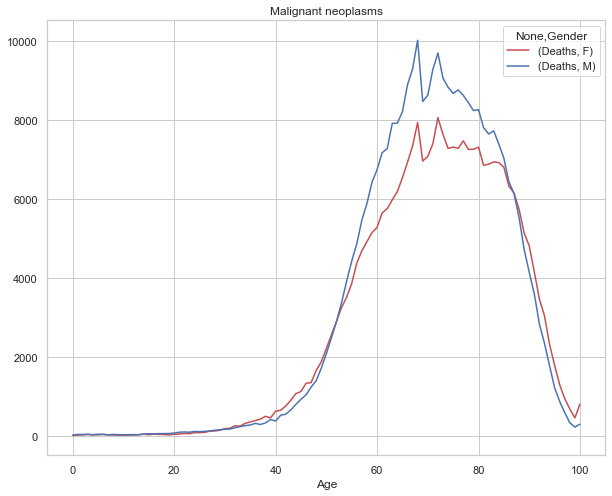

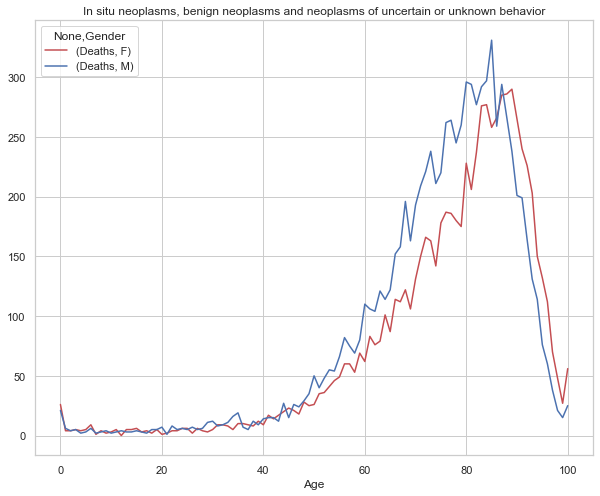

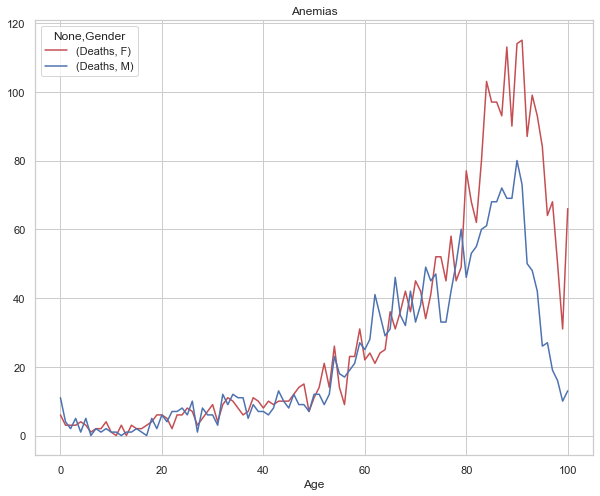

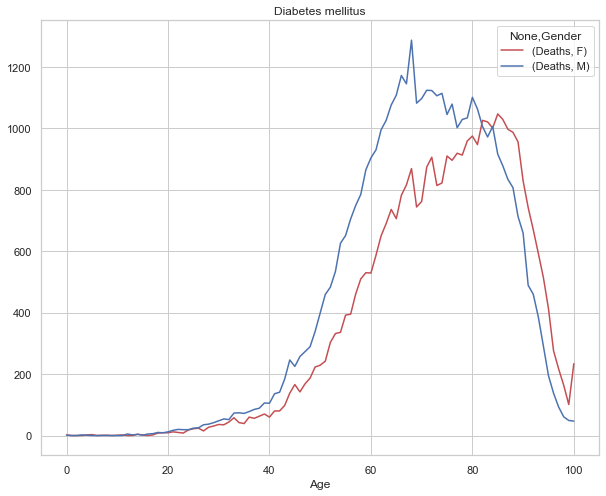

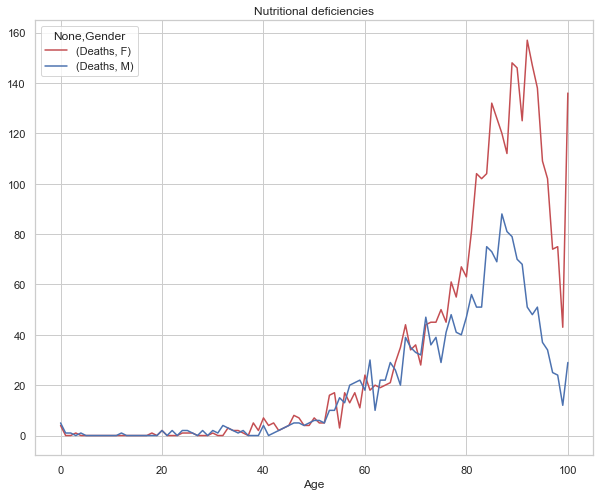

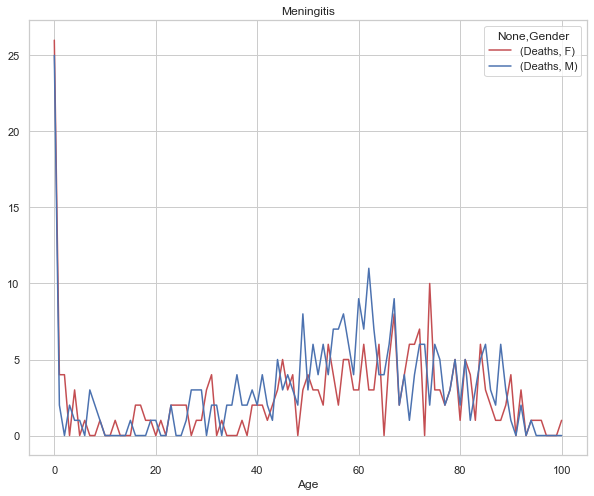

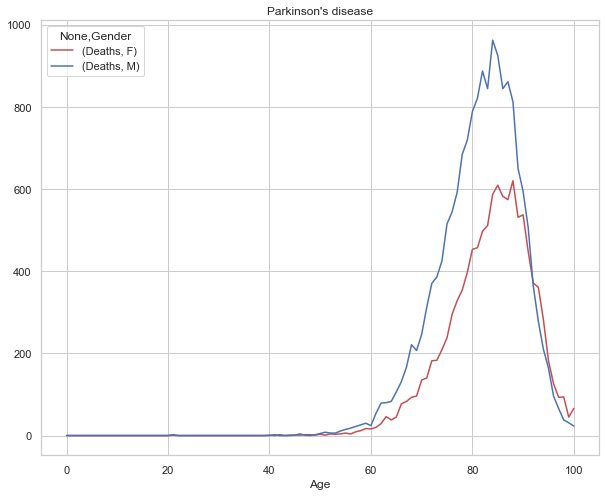

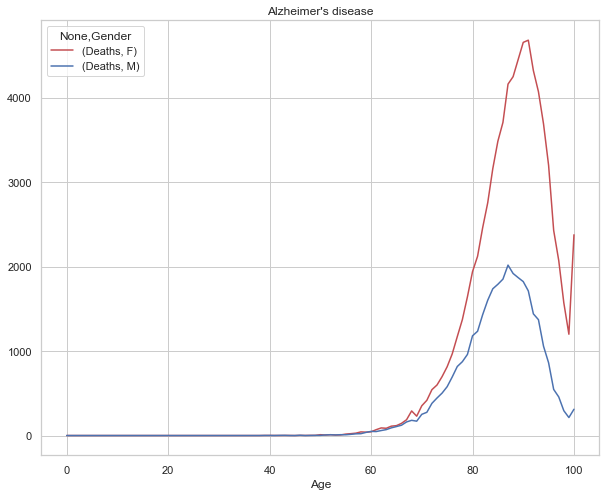

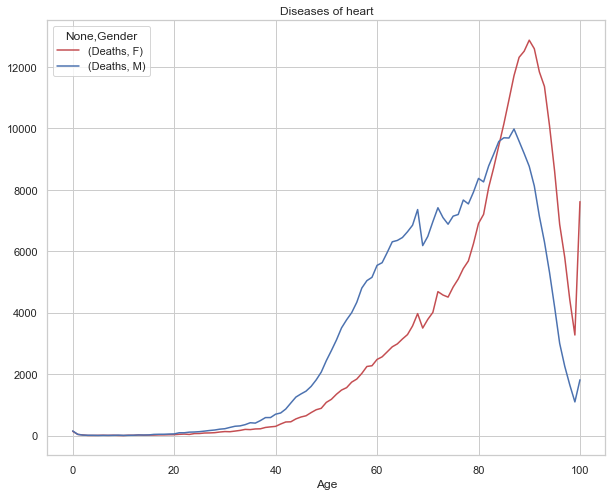

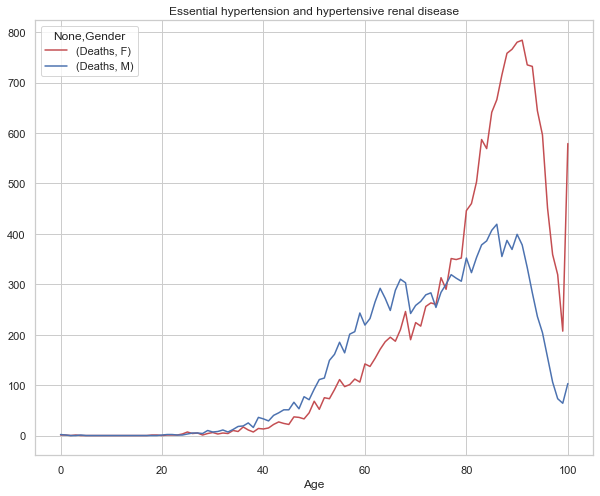

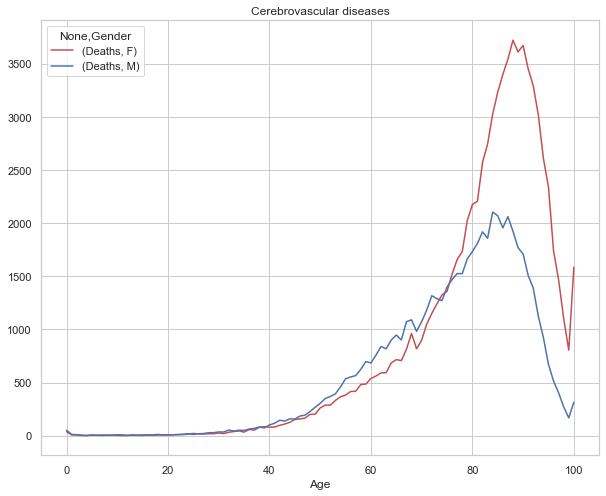

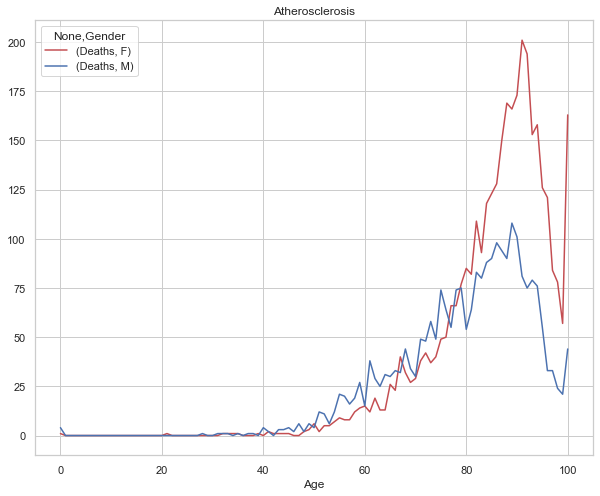

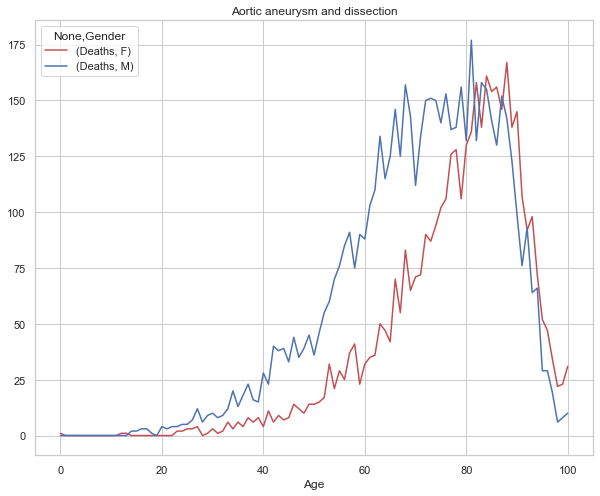

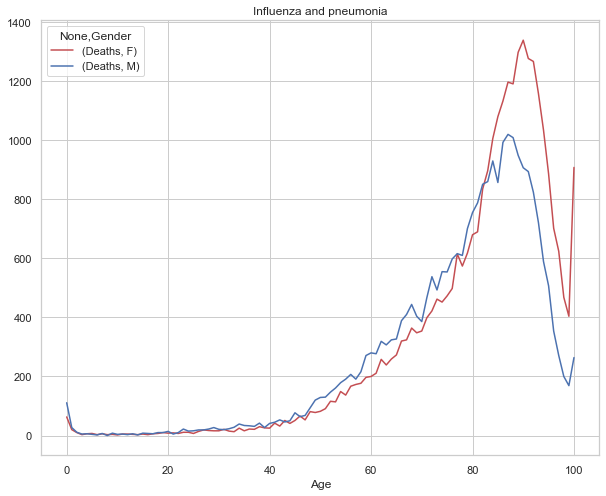

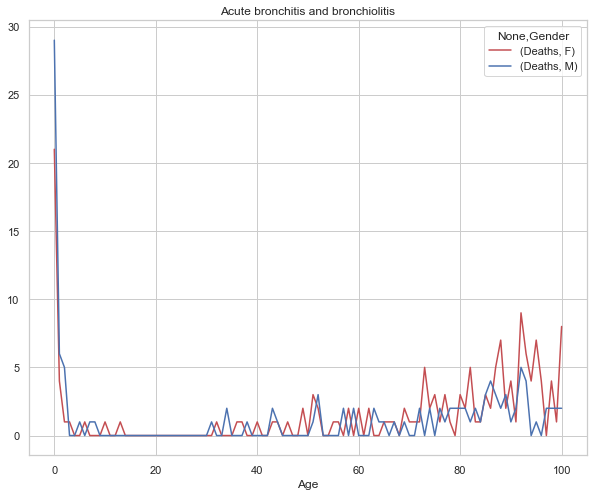

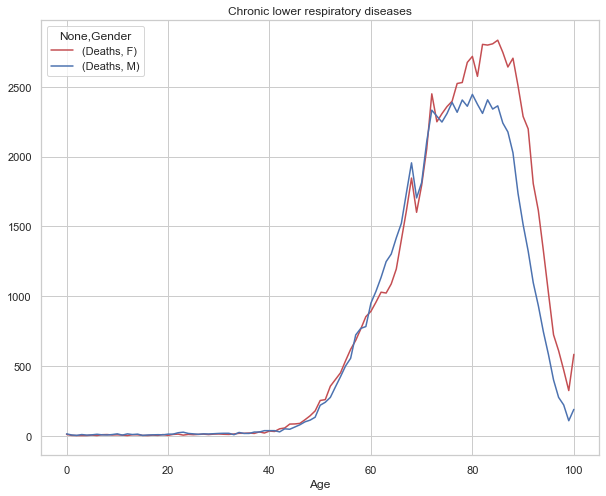

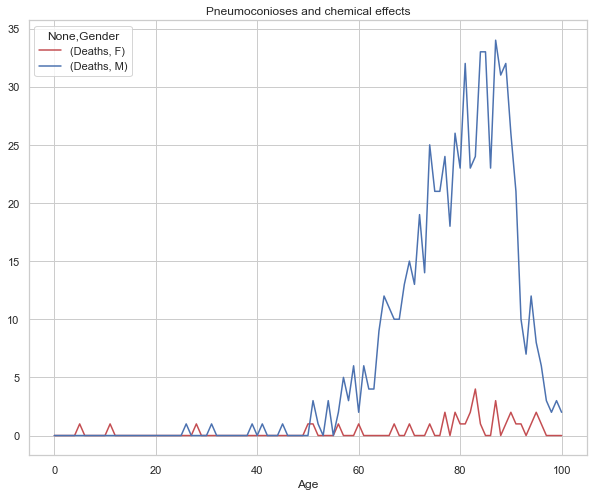

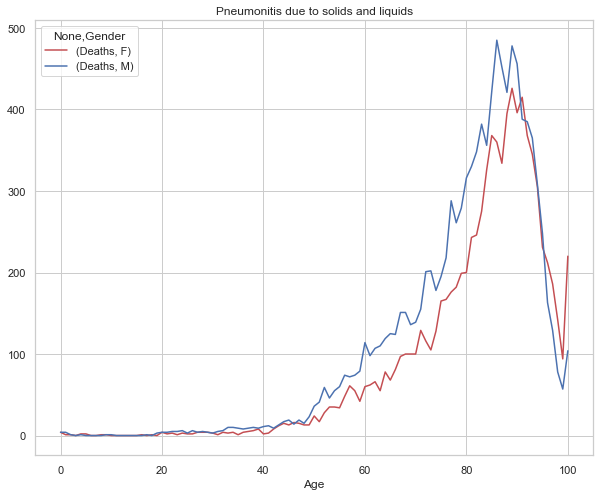

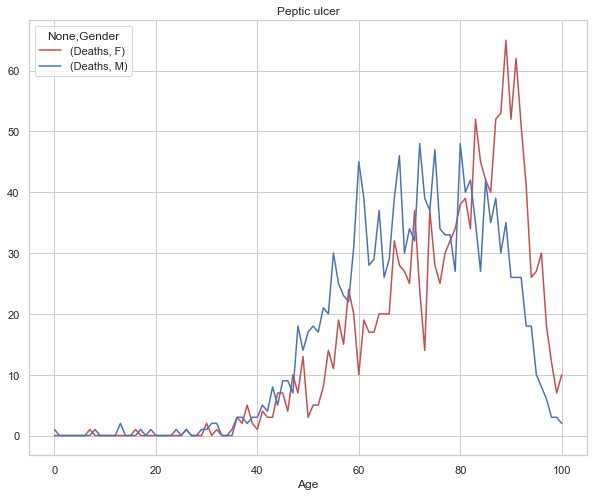

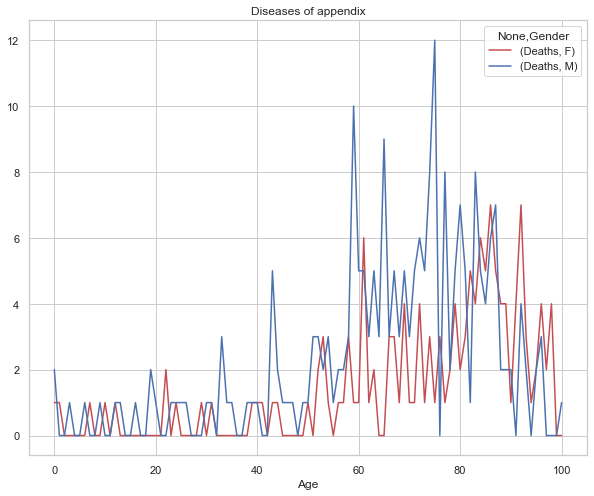

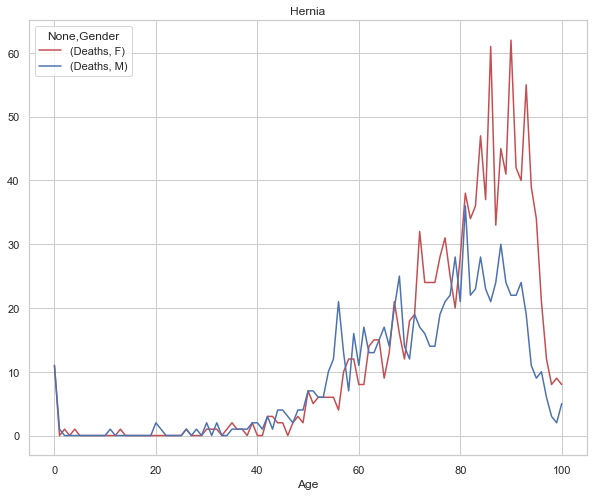

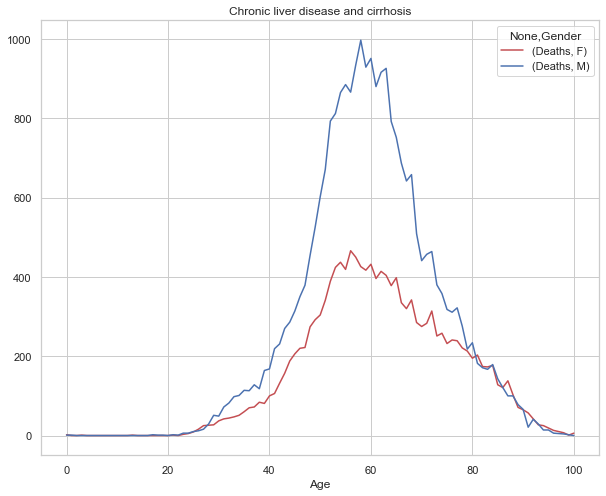

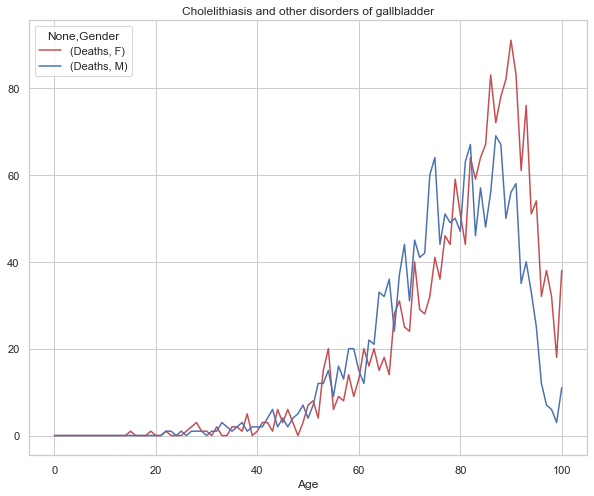

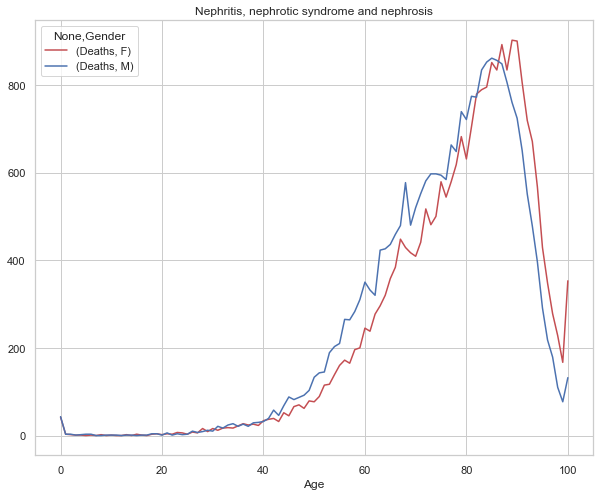

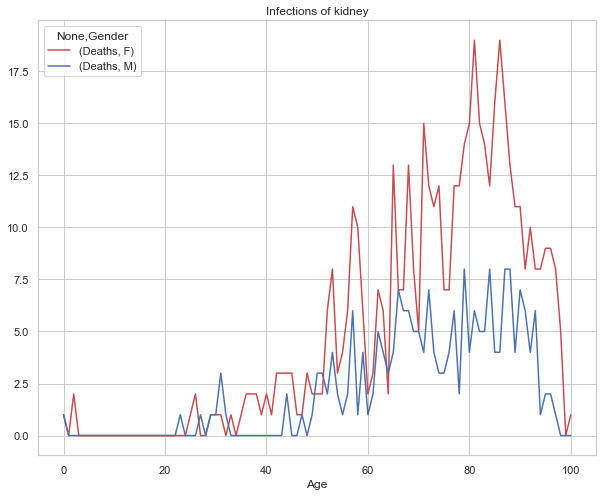

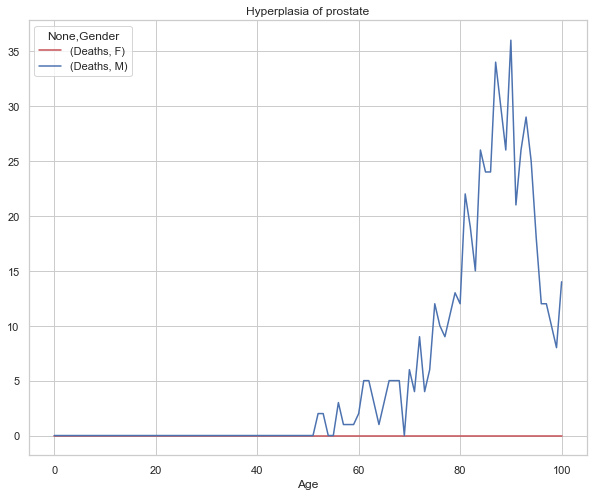

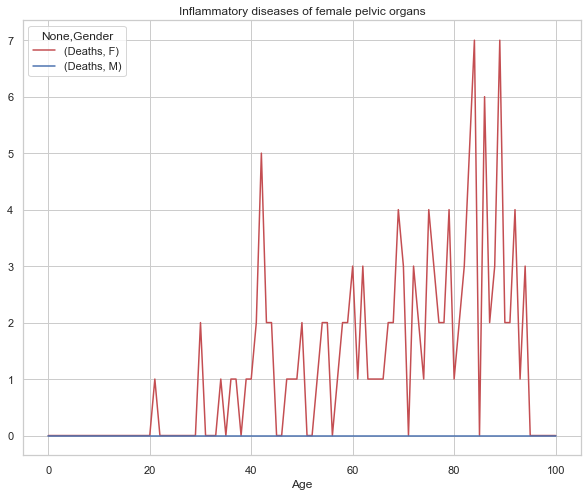

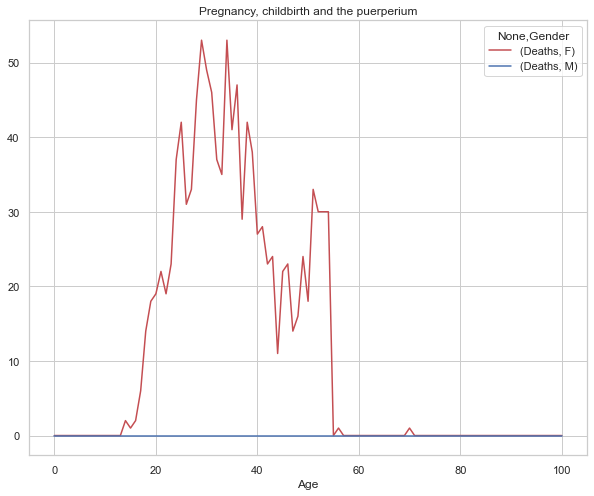

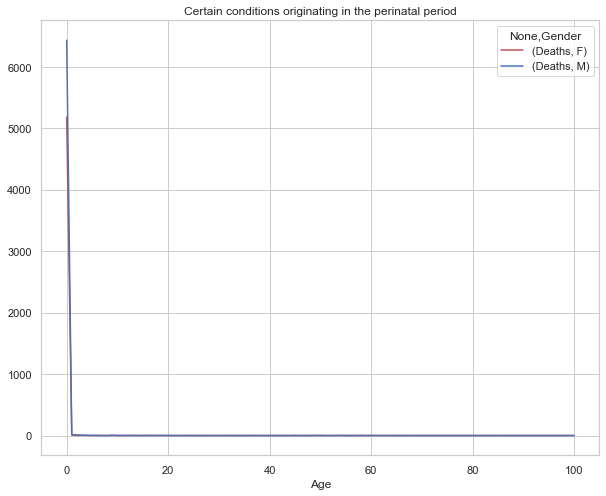

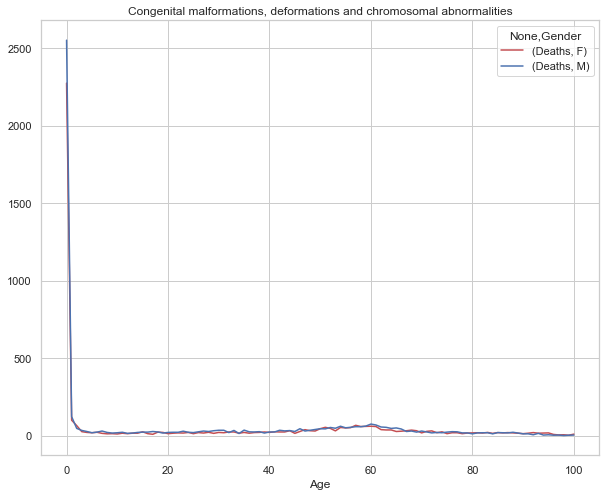

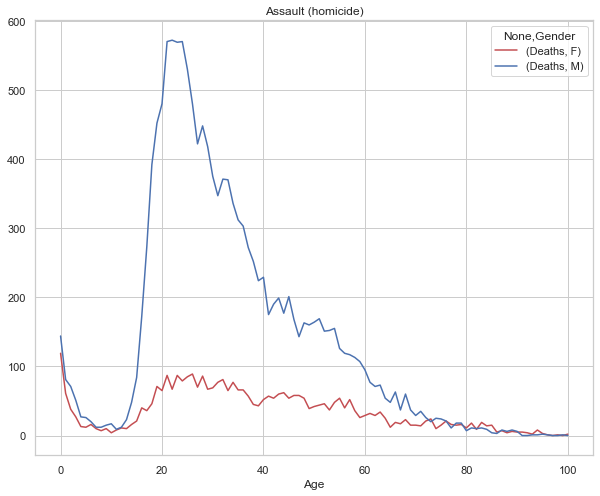

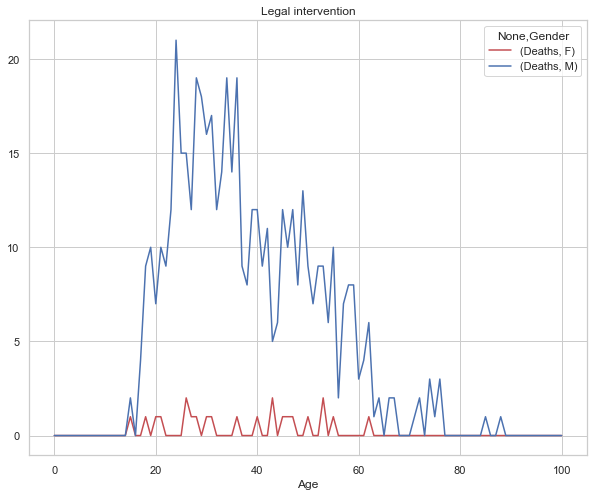

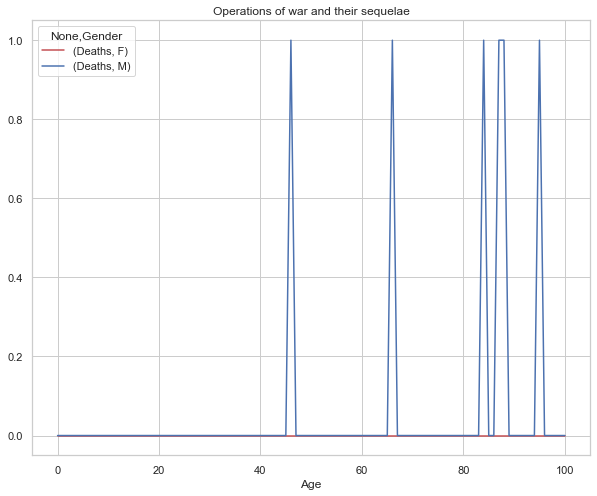

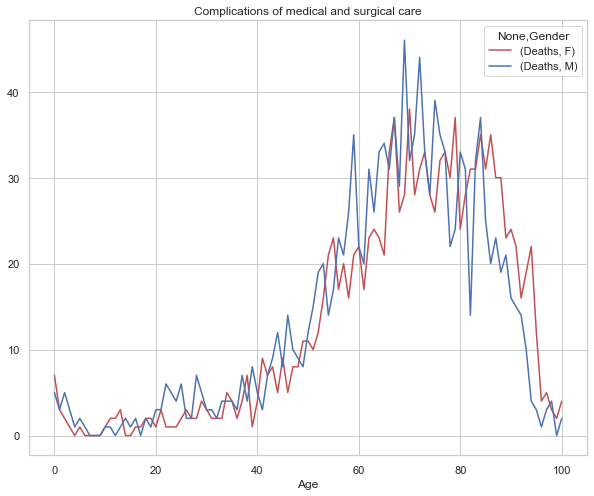

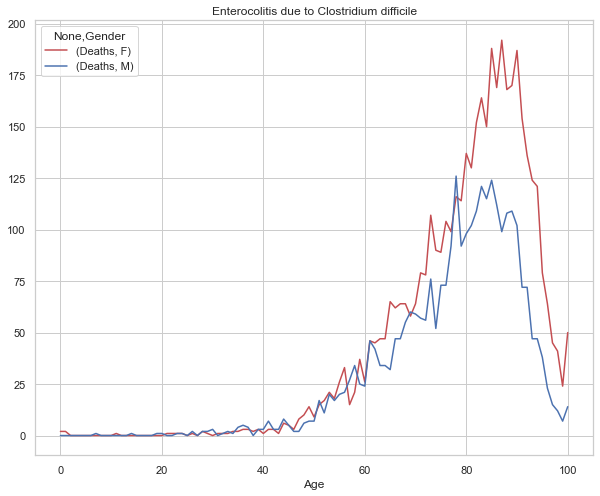

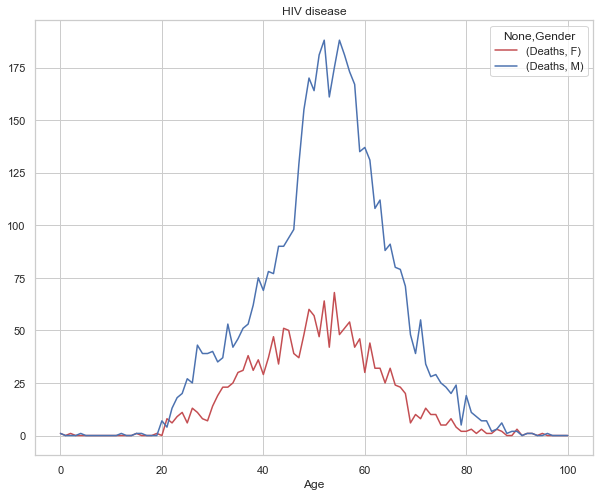

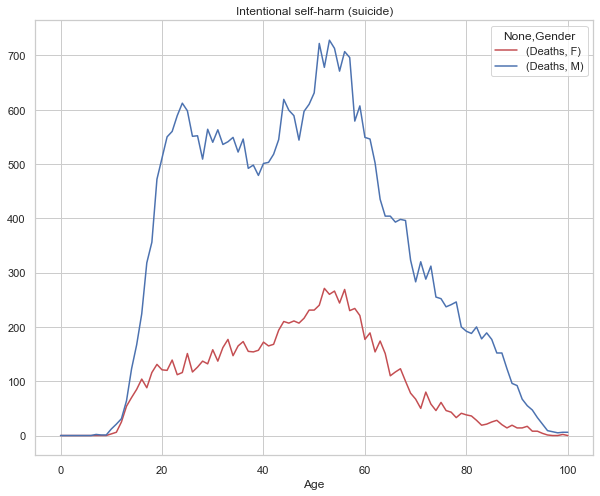

In [39]:
clist = df.Cause.unique()

for cause in clist:
    df2015_clist = df2015[df2015["Cause"].isin([cause])]
    
    df2015_clist\
    .groupby(["Age", "Gender"])\
    .agg({'Deaths':sum})\
    .unstack([1])\
    .plot(kind="line", legend=True, color=('r', 'b'), figsize=[10, 8], title=str(cause));

<font color="green">Підсумуйте всі ваші висновки і сформулюйте загальний висновок по дослідженим даним:</font>

Висновки по датасету:

1.1.Жінки переважно помирають в похилом віці

2.Чоловіки частіше помирають в молодому віці, навіть в утробі матері

3.Приблизно в тричі більше жінок живуть до 100 років

4.Жінки живуть довше

5.Для жінок більш небепезпечнішими є:..., для чоловіків: